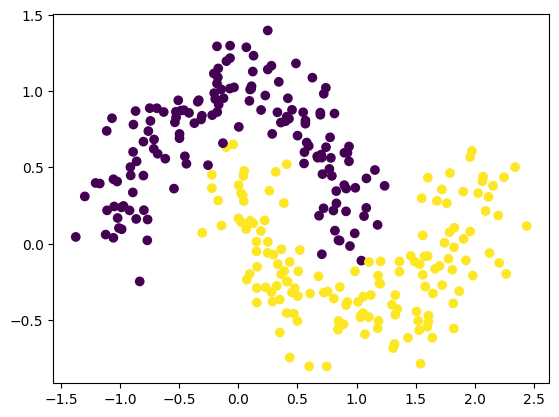

In [ ]:
import sklearn.datasets as d
import matplotlib.pyplot as plt

X, y = d.make_moons(n_samples = 300, noise = 0.16, random_state = 42)

plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                    test_size = 0.3, random_state = 100)
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate

# SVM, kernel = 'linear'로 선형분리 진행
svm_clf =svm.SVC(kernel = 'linear', random_state=100)

# 교차검증
scores = cross_val_score(svm_clf, X, y, cv = 5)
print('선형 분리 교차검증 평균: ', scores.mean())

# SVM, kernel = 'rbf'로 비선형분리 진행
svm_clf =svm.SVC(kernel = 'rbf')

# 교차검증
scores = cross_val_score(svm_clf, X, y, cv = 5)
print('비선형 분리 교차검증 평균: ', scores.mean())

선형 분리 교차검증 평균:  0.86
비선형 분리 교차검증 평균:  0.97


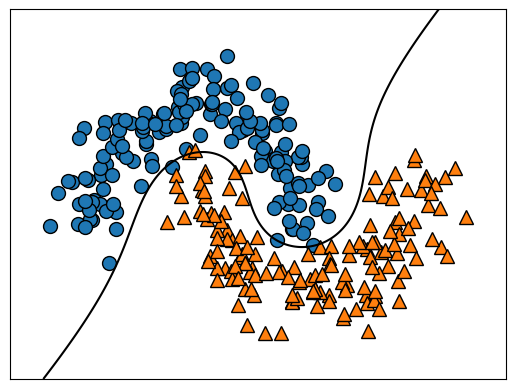

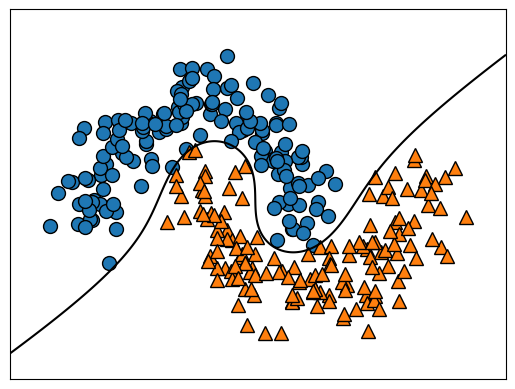

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import mglearn

poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))])

poly_kernel_svm_clf.fit(X, y)

poly_kernel_svm_clf2 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))])

poly_kernel_svm_clf2.fit(X, y)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
mglearn.plots.plot_2d_separator(poly_kernel_svm_clf, X)
plt.show()


mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
mglearn.plots.plot_2d_separator(poly_kernel_svm_clf2, X)
plt.show()

In [ ]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC, SVC

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", max_iter=2000, random_state=42))
    ])
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf',
                 LinearSVC(C=10, loss='hinge', max_iter=2000,
                           random_state=42))])